In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,NaN,0.67,0.48,0.27,NaN,0.0,0.53,0.22
2,0.64,NaN,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	111
float64		column 2	37
float64		column 3	74
float64		column 4	37
float64		column 5	37
float64		column 6	111
float64		column 7	148
float64		column 8	37


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1373.000000,1447.000000,1410.000000,1447.000000,1447.000000,1373.000000,1336.000000,1447.000000
mean,0.501034,0.500774,0.500362,0.259917,0.504838,0.008106,0.500277,0.275943
std,0.136407,0.124066,0.085279,0.136682,0.048960,0.078653,0.056256,0.106128
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

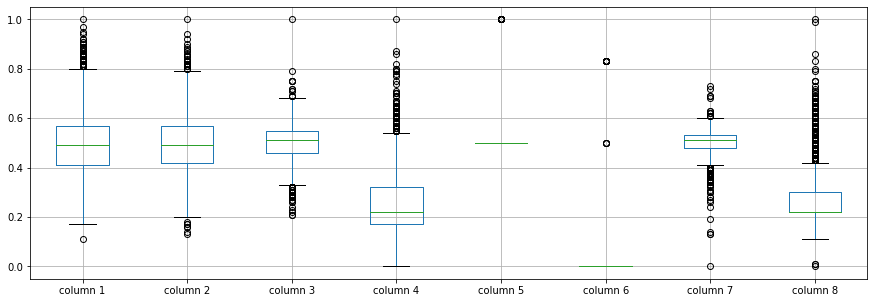

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.501034
column 2    0.500774
column 3    0.500362
column 4    0.259917
column 5    0.504838
column 6    0.008106
column 7    0.500277
column 8    0.275943
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.575735,-0.142566,0.164471,0.079481,0.004716,0.076085,-0.124120
column 2,0.575735,1.000000,-0.267301,0.141157,0.061675,0.000055,0.073836,-0.109795
column 3,-0.142566,-0.267301,1.000000,0.048267,-0.009138,0.007155,-0.158176,-0.017293
column 4,0.164471,0.141157,0.048267,1.000000,-0.018896,-0.009039,-0.085373,-0.061275
column 5,0.079481,0.061675,-0.009138,-0.018896,1.000000,-0.010757,0.052859,0.003839
column 6,0.004716,0.000055,0.007155,-0.009039,-0.010757,1.000000,0.020642,-0.037612
column 7,0.076085,0.073836,-0.158176,-0.085373,0.052859,0.020642,1.000000,0.083669
column 8,-0.124120,-0.109795,-0.017293,-0.061275,0.003839,-0.037612,0.083669,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+45,8+45+45,8+45+45+45,8+45+45+45+45,8+45+45+45+45+45,8+45+45+45+45+45+45,8+45+45+45+45+45,8+45+45+45+45,8+45+45+45,8+45+45,8+45,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.7754677482273267
Epoch: 1 , loss: 2.32686965621036
Epoch: 2 , loss: 2.1318747660388118
Epoch: 3 , loss: 2.0148066243399745
Epoch: 4 , loss: 1.8746543371159097
Epoch: 5 , loss: 1.8014302046402642
Epoch: 6 , loss: 1.7391903698444366
Epoch: 7 , loss: 1.6553635856379634
Epoch: 8 , loss: 1.5703682277513586
Epoch: 9 , loss: 1.544357814218687
Epoch: 10 , loss: 1.4850432678409244
Epoch: 11 , loss: 1.4317119600980177
Epoch: 12 , loss: 1.409836180832075
Epoch: 13 , loss: 1.3641547146050825
Epoch: 14 , loss: 1.3234968379787777
Epoch: 15 , loss: 1.3011010749184566
Epoch: 16 , loss: 1.2610969815565192
Epoch: 17 , loss: 1.2603665382965752
Epoch: 18 , loss: 1.2405453862055489
Epoch: 19 , loss: 1.1990650419307791
Epoch: 20 , loss: 1.1915440656568692
Epoch: 21 , loss: 1.1689973337494808
Epoch: 22 , loss: 1.170036924921948
Epoch: 23 , loss: 1.1344314638687216
Epoch: 24 , loss: 1.1274139252693758
Epoch: 25 , loss: 1.112

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
1,0.147761,0.000000,0.00000,0.0,0.080794,0.0,0.0,0.0
2,0.000000,-0.337068,0.00000,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
1480,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
1481,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
1482,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3.556224799151714, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.07581898987114172

In [18]:
new_df.iloc[66,:]

column 1    0.46000
column 2    0.49000
column 3    0.58000
column 4    0.23000
column 5    0.50000
column 6    0.00000
column 7    0.57344
column 8    0.22000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.610000,0.47000,0.13,0.500000,0.0,0.48,0.22
1,0.577761,0.670000,0.48000,0.27,0.580794,0.0,0.53,0.22
2,0.640000,0.282932,0.49000,0.15,0.500000,0.0,0.53,0.22
3,0.580000,0.440000,0.57000,0.13,0.500000,0.0,0.54,0.22
4,0.420000,0.440000,0.48000,0.54,0.500000,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.820000,0.630000,0.47000,0.18,0.500000,0.0,0.50,0.22
1480,0.350000,0.290000,0.46000,0.14,0.500000,0.0,0.54,0.66
1481,0.410000,0.470000,0.50000,0.14,0.500000,0.0,0.53,0.37
1482,0.510000,0.450000,0.62000,0.25,0.500000,0.0,0.59,0.22


In [20]:
imputations[-1].to_excel("Yeast_NG_5(imp).xlsx", index=False, header=False)